In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
dataset=pd.read_csv('C:\\Users\\super\\Desktop\\ECK-Train\\soda.csv')
dataset.head()

,temperature,units_sold
0,44,2600
1,96,12126
2,96,12107
3,36,1639
4,42,2400


In [5]:
dataset.describe()

,temperature,units_sold
count,50.000000,50.000000
mean,62.720000,5699.840000
std,20.945059,3619.349493
min,30.000000,1042.000000
25%,44.000000,3037.500000
50%,60.500000,4992.000000
75%,77.000000,7503.500000
max,99.000000,13194.000000


Text(0, 0.5, 'Soda units sold')

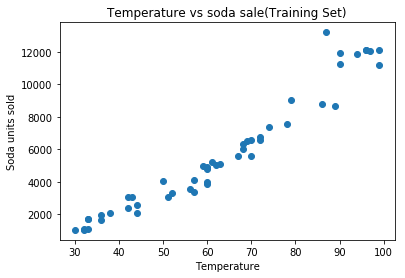

In [6]:
plt.scatter(dataset.temperature,dataset.units_sold)
plt.title('Temperature vs soda sale(Training Set)')
plt.xlabel('Temperature')
plt.ylabel('Soda units sold')

# Preprocessing

In [7]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,1].values

# Train Test Split

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)


In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.fit_transform(X_test)

In [13]:
X_train[0:5]

array([[33],
       [60],
       [44],
       [57],
       [96]], dtype=int64)

In [14]:
print(X_train_poly[0:5])

[[1.000e+00 3.300e+01 1.089e+03]
 [1.000e+00 6.000e+01 3.600e+03]
 [1.000e+00 4.400e+01 1.936e+03]
 [1.000e+00 5.700e+01 3.249e+03]
 [1.000e+00 9.600e+01 9.216e+03]]


In [15]:
from sklearn.linear_model import LinearRegression

#create regressor using linear regression
regressor=LinearRegression()

#training our model
regressor.fit(X_train_poly,y_train)


#predicting values using our trained model
y_pred=regressor.predict(X_test_poly)


In [16]:
y_pred

array([ 4131.71000567,  6244.66052604,  5055.77618864,  1312.16097971,
        6424.24243129,  3428.62619185, 11948.16978105,  5892.80267976,
        4279.63273265,  3564.3723118 ,  2430.3288028 ,  4895.67685463,
        1885.54088031,  6067.5139422 ,  2316.50057549])

## Lets see how the model does against our test data

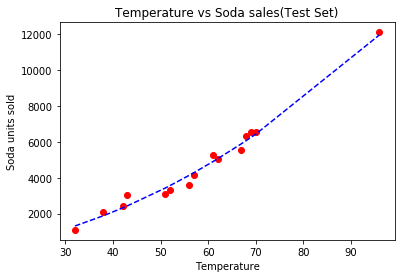

In [19]:
plt.scatter(X_test,y_test,color='red')
plt.plot(sorted(X_test),sorted(y_pred),'--',color='blue')
plt.title('Temperature vs Soda sales(Test Set)')
plt.xlabel('Temperature')
plt.ylabel('Soda units sold')
plt.show()




In [20]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,r2_score
ex_var_score=explained_variance_score(y_test,y_pred)
m_absolute_error=mean_absolute_error(y_test,y_pred)
me_sq_error=mean_squared_error(y_test,y_pred)
r2_sc=r2_score(y_test,y_pred)

In [21]:
print('Explained Variance Score:'+str(ex_var_score))
print('Mean Absolute Error:'+str(m_absolute_error))
print('Mean Squared Error:'+str(me_sq_error))
print('R2 Score:'+str(r2_sc))

Explained Variance Score:0.9859124280633677
Mean Absolute Error:263.2964864174768
Mean Squared Error:93590.09927195679
R2 Score:0.985888417839232
